In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import random
import seaborn as sns
import os
import pickle

In [14]:
mnist = fetch_openml('mnist_784', version=1)
x, y = mnist['data'], mnist['target']

print("Shape:", x.shape)
print("label sample:", y[:5])

Shape: (70000, 784)
label sample: 0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


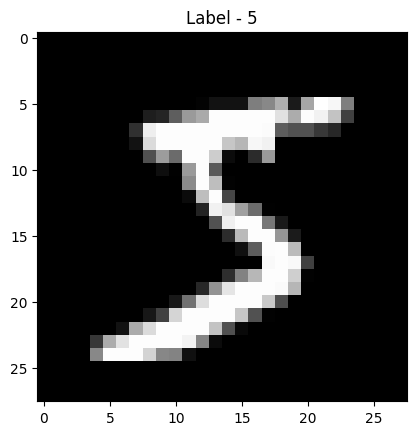

In [15]:

image = x.iloc[0].values.reshape(28, 28)
label = y.iloc[0]

plt.imshow(image, cmap='gray')
plt.title(f"Label - {label}")
plt.show()

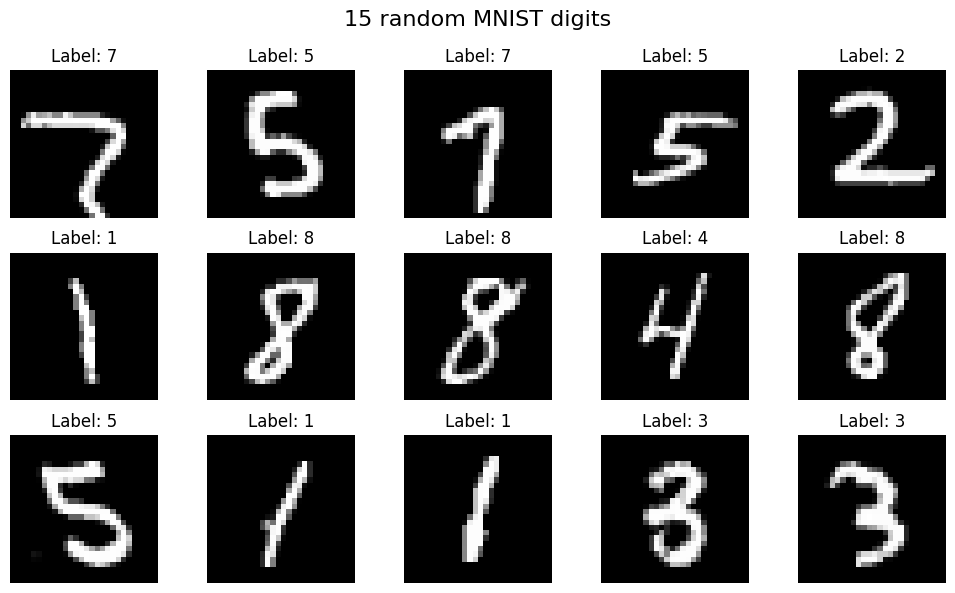

In [16]:
fig, ax = plt.subplots(3, 5, figsize=(10, 6))
fig.suptitle("15 random MNIST digits", fontsize=16)

for i in range(3):
    for j in range(5):
        index = random.randint(0, len(x)-1)
        image = x.iloc[index].values.reshape(28, 28)
        label = y.iloc[index]

        ax[i][j].imshow(image, cmap="gray")
        ax[i][j].set_title(f"Label: {label}")
        ax[i][j].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

In [17]:
# normalazing x
x = x / 255

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size=0.2)

In [31]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200)
model.fit(x_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
pred = model.predict(x_test)
acc = round(accuracy_score(y_test, pred)*100, 2)
print(f"Accuracy Model: {acc}")

Accuracy Model: 97.04


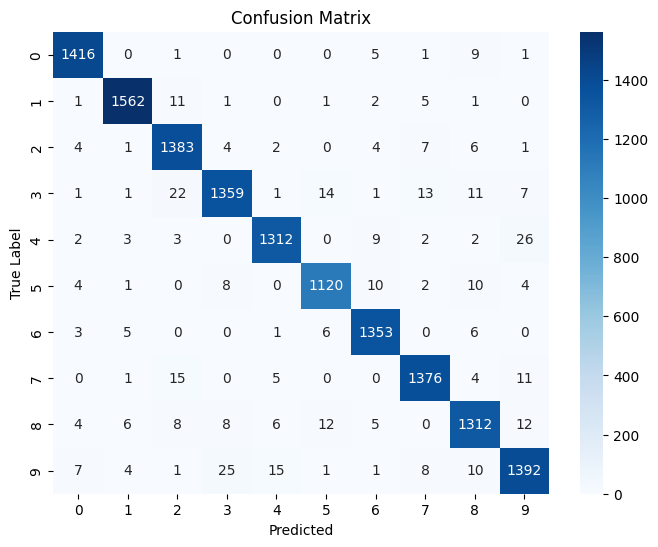

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1433
           1       0.99      0.99      0.99      1584
           2       0.96      0.98      0.97      1412
           3       0.97      0.95      0.96      1430
           4       0.98      0.97      0.97      1359
           5       0.97      0.97      0.97      1159
           6       0.97      0.98      0.98      1374
           7       0.97      0.97      0.97      1412
           8       0.96      0.96      0.96      1373
           9       0.96      0.95      0.95      1464

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



In [33]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
print(classification_report(y_test, pred))

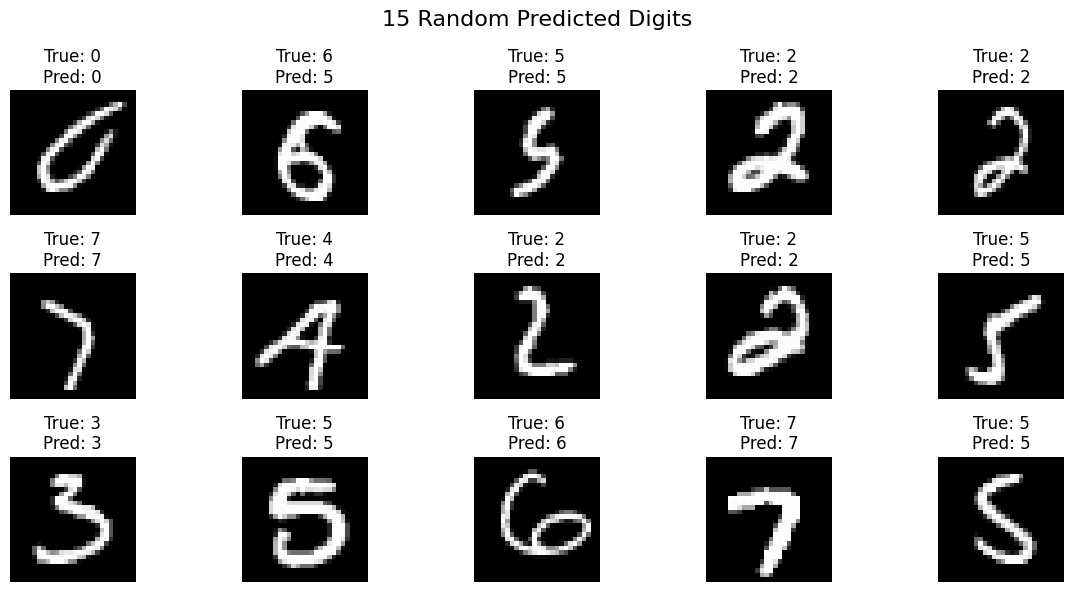

In [34]:
random_index = [random.randint(0, len(y_test) - 1) for _ in range(15)]
images = [x_test.iloc[i].values.reshape(28, 28) for i in random_index]
true_labels = [y_test.iloc[i] for i in random_index]
predicted_labels = [pred[i] for i in random_index]
fig, ax = plt.subplots(3, 5, figsize=(12, 6))
fig.suptitle("15 Random Predicted Digits", fontsize=16)

for idx, axi in enumerate(ax.flat):
    axi.imshow(images[idx], cmap='gray')
    axi.set_title(f"True: {true_labels[idx]}\nPred: {predicted_labels[idx]}")
    axi.axis('off')
plt.tight_layout()
plt.show()


In [35]:
os.makedirs("models", exist_ok=True)

In [36]:
import pickle

with open("models/LogisticRegression.pkl", "wb") as f:
    pickle.dump(model, f)